# Utilizando somente 1 neurônio

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

train_data = pd.read_csv('treino_sinais_vitais_com_label.csv')
test_data = pd.read_csv('treino_sinais_vitais_sem_label.csv')

X_train = train_data[["si3", "si4", "si5"]].values  
y_train_gi = train_data["gi"].values  

X_test = test_data[["si3", "si4", "si5"]].values
y_test_gi = test_data["gi"].values  

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_regression = Sequential(
    [Dense(1, input_dim=3, activation="linear")]  
)

model_regression.compile(
    optimizer=Adam(learning_rate=0.03), loss="mse", metrics=["mae"]
)

model_regression.fit(X_train, y_train_gi, epochs=200, batch_size=10, verbose=1)

y_pred_gi = model_regression.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test_gi, y_pred_gi))
print(f"RMSE para regressão: {rmse}")

Epoch 1/200


/home/teteus/Documents/sistemas_inteligentes/trabalho02/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1942.5039 - mae: 41.1112
Epoch 2/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1512.2466 - mae: 35.8441
Epoch 3/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1233.3629 - mae: 31.6747
Epoch 4/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1027.0790 - mae: 28.7427
Epoch 5/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 803.7422 - mae: 24.7806
Epoch 6/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 693.1913 - mae: 22.7902
Epoch 7/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 549.1854 - mae: 19.9597
Epoch 8/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 428.9346 - mae: 17.1385
Epoch 9/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 380.3535 - mae: 15.9337
Epoch 10/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 323.3878 - mae: 14.6147
Epoch 11/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 264.2952 - mae: 13.1228
Epoch 12/200
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 241.9617 

In [47]:
results = pd.DataFrame()
results['gi'] = test_data['gi'].reset_index(drop=True)
results['gi_pred'] = y_pred_gi.flatten()

results['percentage'] = (results['gi_pred']) / results['gi']

results

,gi,gi_pred,percentage
0,40.000000,47.641941,1.191049
1,41.530426,45.720337,1.100888
2,52.730748,49.429195,0.937388
3,34.679910,41.111912,1.185468
4,69.375881,44.117523,0.635920
...,...,...,...
1495,24.494467,38.476479,1.570823
1496,65.385014,39.187809,0.599339
1497,24.530703,49.349808,2.011757
1498,61.062548,43.194950,0.707389


# Utilizando rede neural com camadas ocultas

In [50]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("treino_sinais_vitais_com_label.csv")
test_data = pd.read_csv("treino_sinais_vitais_sem_label.csv")

X_train = train_data[["si3", "si4", "si5"]].values
y_train_gi = train_data["gi"].values

X_test = test_data[["si3", "si4", "si5"]].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_regression = Sequential(
    [
        Dense(64, input_dim=3, activation="relu"),  # Camada oculta com 64 neurônios
        Dense(32, activation="relu"),  # Outra camada oculta com 32 neurônios
        Dense(1, activation="linear"),  # Camada de saída com 1 neurônio
    ]
)

model_regression.compile(
    optimizer=Adam(learning_rate=0.03), loss="mse", metrics=["mae"]
)

history = model_regression.fit(
    X_train, y_train_gi, epochs=200, batch_size=16, verbose=1
)

predicted_gi = model_regression.predict(X_test)

results = test_data.copy()
results["predicted_gi"] = predicted_gi
results.to_csv("resultados_preditos.csv", index=False)

print("Previsões salvas no arquivo 'resultados_preditos.csv'.")

/home/teteus/Documents/sistemas_inteligentes/trabalho02/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 805.8064 - mae: 22.2358
Epoch 2/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 215.4496 - mae: 11.8103
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 120.7968 - mae: 8.5484
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102.5739 - mae: 7.8544
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 89.6223 - mae: 7.2610
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 102.3587 - mae: 7.8120
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 92.1329 - mae: 7.3795
Epoch 8/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 74.2651 - mae: 6.7867
Epoch 9/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.1068 - mae: 5.1635
Epoch 10/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.8265 - mae: 4.6100
Epoch 11/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.6720 - mae: 3.5637
Epoch 12/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.3177 - mae: 3.2061
Epoch 13/200
94/94

In [51]:
results.head(10)

,i,si1,si2,si3,si4,si5,gi,yi,predicted_gi
0,1,13.592433,12.220855,8.416754,75.921057,21.635259,40.000000,NaN,40.840771
1,2,15.775386,13.586879,8.725890,63.813564,19.718734,41.530426,NaN,42.201286
2,3,3.649369,1.904802,0.000000,197.210213,19.045471,52.730748,NaN,52.410698
3,4,17.264362,13.700638,8.733333,143.636181,17.621141,34.679910,NaN,36.086372
4,5,12.705183,9.485389,1.747626,82.636672,12.209535,69.375881,NaN,69.903801
5,6,7.573969,1.463106,-6.541057,19.726047,9.215187,14.247813,NaN,15.803205
6,7,11.749524,4.177473,-2.937162,146.911825,2.796695,32.957477,NaN,32.412125
7,8,9.847899,8.203223,-0.000000,127.461258,14.401656,71.214749,NaN,71.974701
8,9,18.143625,14.362603,8.733333,14.768375,19.007228,29.256709,NaN,26.329866
9,10,19.790224,14.473328,8.733333,24.101633,6.041166,13.222719,NaN,13.612119


In [ ]:
results['percentage_error'] = abs((results['predicted_gi'] - results['gi']) / results['gi']) * 100

within_10_percent = results[results['percentage_error'] <= 10]

count_within_10_percent = within_10_percent.shape[0]

total_count = results.shape[0]
percentage_within_10_percent = (count_within_10_percent / total_count) * 100

print(f"Número de previsões dentro da faixa de erro de 10%: {count_within_10_percent}")
print(f"Porcentagem de previsões dentro da faixa de erro de 10%: {percentage_within_10_percent:.2f}%")


Número de previsões dentro da faixa de erro de 10%: 1452
Porcentagem de previsões dentro da faixa de erro de 10%: 96.80%


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

data = pd.read_csv("treino_sinais_vitais_com_label.csv")

X = data[["si3", "si4", "si5"]].values
y = data["yi"].values  

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.35, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_classification = Sequential(
    [
        Dense(64, input_dim=3, activation="relu"),  # Camada oculta com 64 neurônios
        Dense(32, activation="relu"),  # Outra camada oculta com 32 neurônios
        Dense(
            4, activation="softmax"
        ),  # Camada de saída com 4 neurônios (uma para cada classe)
    ]
)

model_classification.compile(
    optimizer=Adam(learning_rate=0.03),
    loss="sparse_categorical_crossentropy", 
    metrics=["accuracy"],
)

history = model_classification.fit(
    X_train, y_train, epochs=100, batch_size=8, verbose=1
)

loss, accuracy = model_classification.evaluate(X_test, y_test, verbose=1)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

predicted_classes = model_classification.predict(X_test)
predicted_labels = label_encoder.inverse_transform(predicted_classes.argmax(axis=1))

test_results = pd.DataFrame(X_test, columns=["si3", "si4", "si5"])
test_results["true_class"] = label_encoder.inverse_transform(y_test)
test_results["predicted_class"] = predicted_labels
test_results.to_csv("classificacao_resultados.csv", index=False)

print("Resultados salvos no arquivo 'classificacao_resultados.csv'.")

Epoch 1/100


/home/teteus/Documents/sistemas_inteligentes/trabalho02/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4588 - loss: 1.0853
Epoch 2/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6887 - loss: 0.7323
Epoch 3/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7475 - loss: 0.6168
Epoch 4/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7604 - loss: 0.5644
Epoch 5/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - loss: 0.5150
Epoch 6/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4696
Epoch 7/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8076 - loss: 0.4535
Epoch 8/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8054 - loss: 0.4399
Epoch 9/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8193 - loss: 0.4637
Epoch 10/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8405 - loss: 0.4006
Epoch 11/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8440 - loss: 0.3876
Epoch 12/100
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

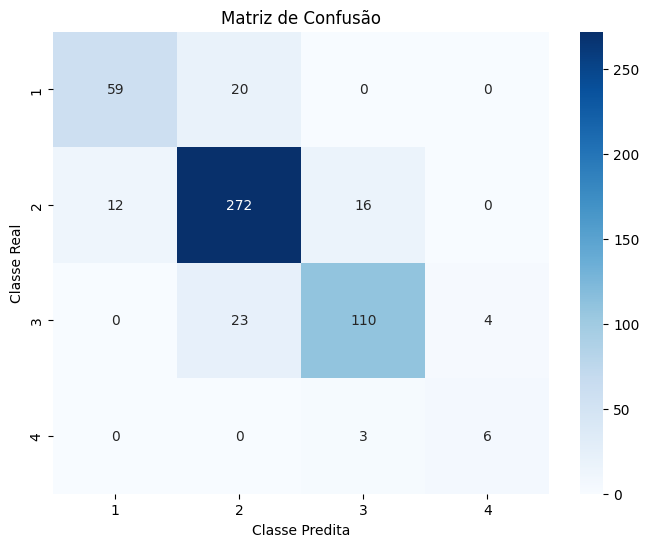

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Gerar a matriz de confusão
cm = confusion_matrix(y_test, predicted_classes.argmax(axis=1))

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()
